# Random Forest & Decision trees 

For this project we will be exploring publicly available data from www.lendingclub.com. 

Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

Importing necessary libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the data and exploring the dataset

In [3]:
df = pd.read_csv("loan_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Performing EDA

In [10]:
#Checking for unique values
df.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

In [30]:
#Checking the types of values and their count present in 'Credit.Policy' & target column
print("Credit Policy :-\n",df['credit.policy'].value_counts())
print("\nNot Fully Paid :-\n",df['not.fully.paid'].value_counts())

Credit Policy :-
 1    7710
0    1868
Name: credit.policy, dtype: int64

Not Fully Paid :-
 0    8045
1    1533
Name: not.fully.paid, dtype: int64


Text(0.5, 0, 'FICO Credit Score')

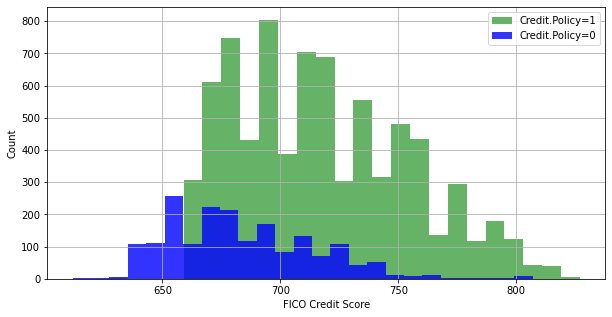

In [26]:
plt.figure(figsize=(10,5))
df[df['credit.policy'] == 1]['fico'].hist(alpha=0.6,color='green', bins=25,label='Credit.Policy=1')
df[df['credit.policy'] == 0]['fico'].hist(alpha=0.8,color='blue', bins=25,label='Credit.Policy=0')
plt.legend()

plt.ylabel('Count')
plt.xlabel('FICO Credit Score')

Text(0.5, 0, 'FICO Credit Score')

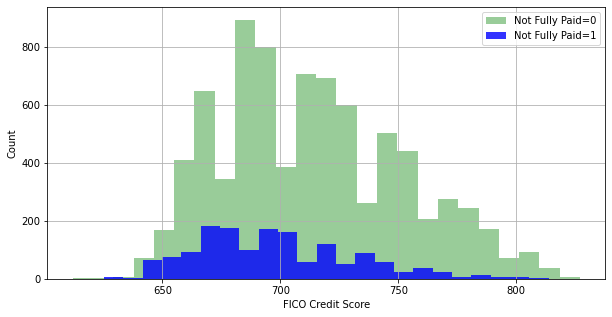

In [39]:
plt.figure(figsize=(10,5))
df[df['not.fully.paid'] == 0]['fico'].hist(alpha=0.4,color='green', bins=25,label='Not Fully Paid=0')
df[df['not.fully.paid']== 1]['fico'].hist(alpha=0.8,color='blue', bins=25,label='Not Fully Paid=1')
plt.legend()

plt.ylabel('Count')
plt.xlabel('FICO Credit Score')

Creating a countplot to show the counts of loans by purpose

<AxesSubplot:xlabel='purpose', ylabel='count'>

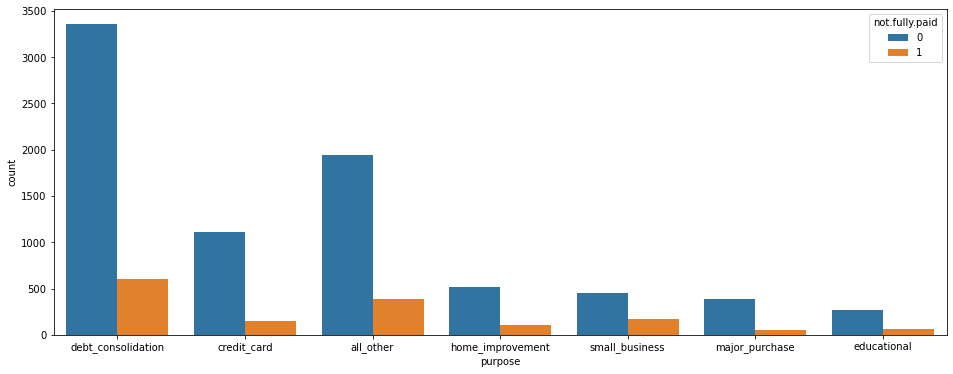

In [44]:
plt.figure(figsize=(16,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=df)

Let's see the trend between FICO score and interest rate

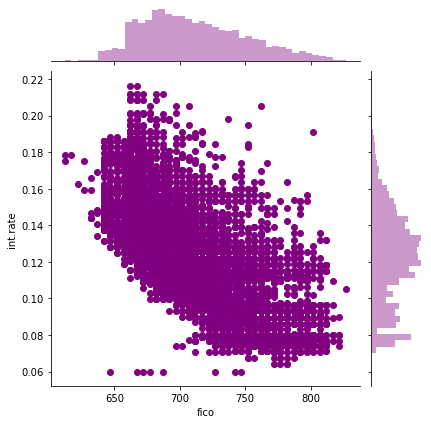

In [57]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple')

Checking the trend between not.fully.paid and credit.policy. 

<Figure size 1080x648 with 0 Axes>

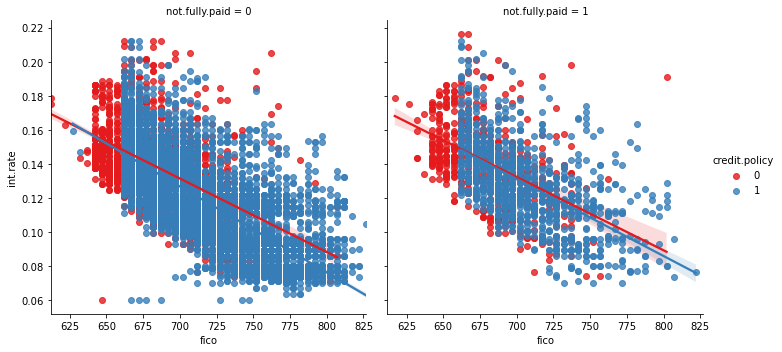

In [62]:
plt.figure(figsize=(15,9))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy', col='not.fully.paid',palette='Set1')

____________
## Building our model

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [65]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

The column 'purpose' consists of categorical values, this column needs to be converted to numerical values to build our model upon

In [70]:
lst = ['purpose']
df_n= pd.get_dummies(data=df,prefix='Purpose',prefix_sep='_',columns=lst)
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  Purpose_all_other           9578 

Now all the columns are of numeric type

### Train test split

In [71]:
from sklearn.model_selection import train_test_split

In [74]:
y = df_n['not.fully.paid']
X = df_n.drop(columns='not.fully.paid')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Decision Tree Model

In [75]:
from sklearn.tree import DecisionTreeClassifier

Training our model

In [77]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

Testing our model

In [86]:
prediction1 = dtree.predict(X_test)

Results

In [82]:
from sklearn.metrics import classification_report,confusion_matrix

In [84]:
print(classification_report(y_true=y_test, y_pred=prediction1))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2650
           1       0.20      0.21      0.21       511

    accuracy                           0.74      3161
   macro avg       0.53      0.53      0.53      3161
weighted avg       0.74      0.74      0.74      3161



In [85]:
print(confusion_matrix(y_true=y_test,y_pred=prediction1))

[[2234  416]
 [ 404  107]]


### Random Forest Model

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rfc = RandomForestClassifier()

In [90]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

Testing our model

In [91]:
pred = rfc.predict(X_test)

Results

In [92]:
print(classification_report(y_pred=pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2650
           1       0.39      0.01      0.03       511

    accuracy                           0.84      3161
   macro avg       0.61      0.50      0.47      3161
weighted avg       0.77      0.84      0.77      3161



In [93]:
print(confusion_matrix(y_pred=pred, y_true=y_test))

[[2639   11]
 [ 504    7]]


_________________________________